In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set(style='darkgrid')

In [3]:
# Import Data 

customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
# Exploring the Data 

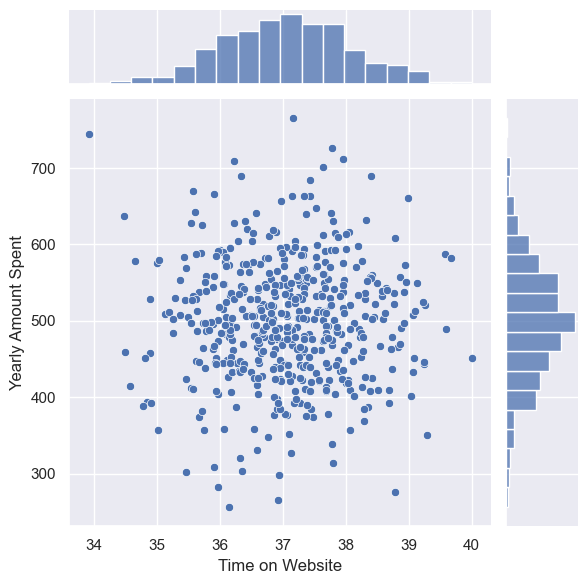

In [14]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

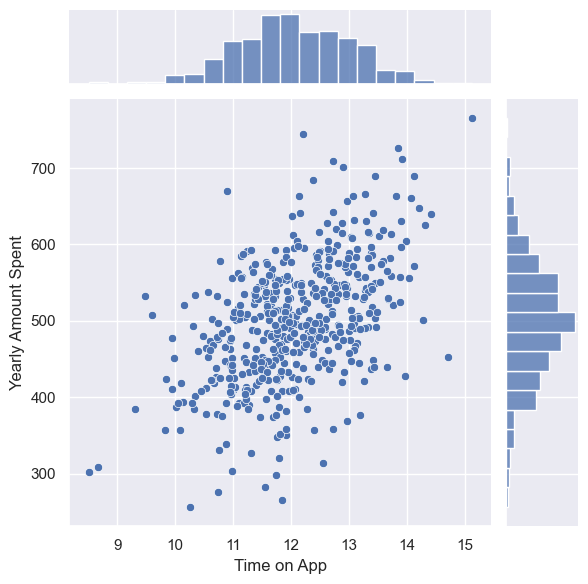

In [22]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

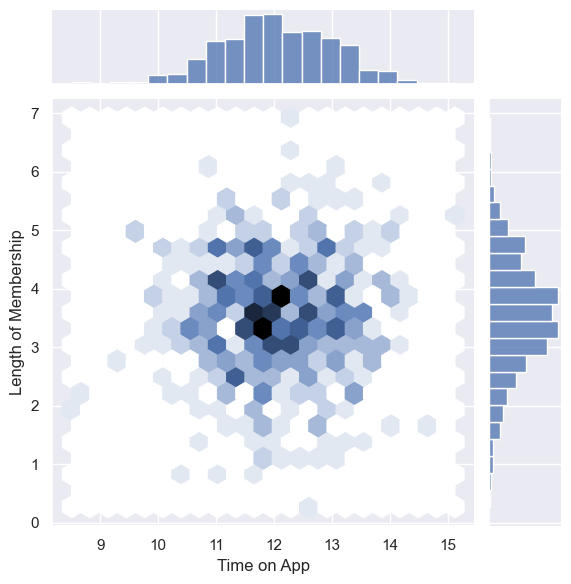

In [23]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

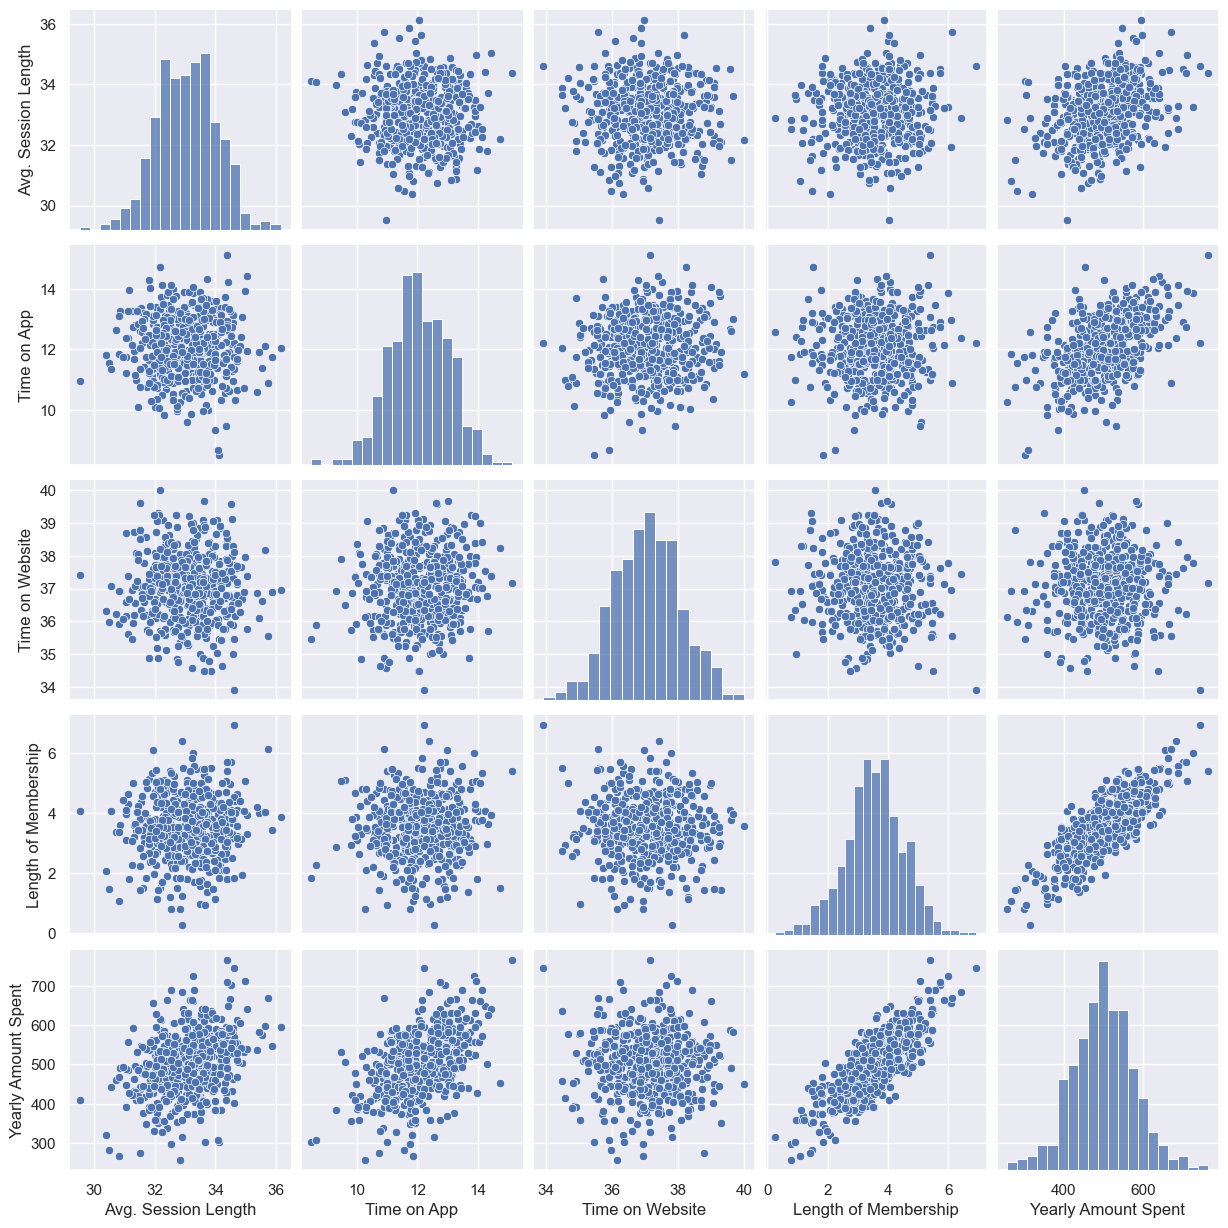

In [24]:
sns.pairplot(data=customers)

In [26]:
# Bases off this plot it looks like the most correlated features are
# Yearly Amount Spent and Length of Membership

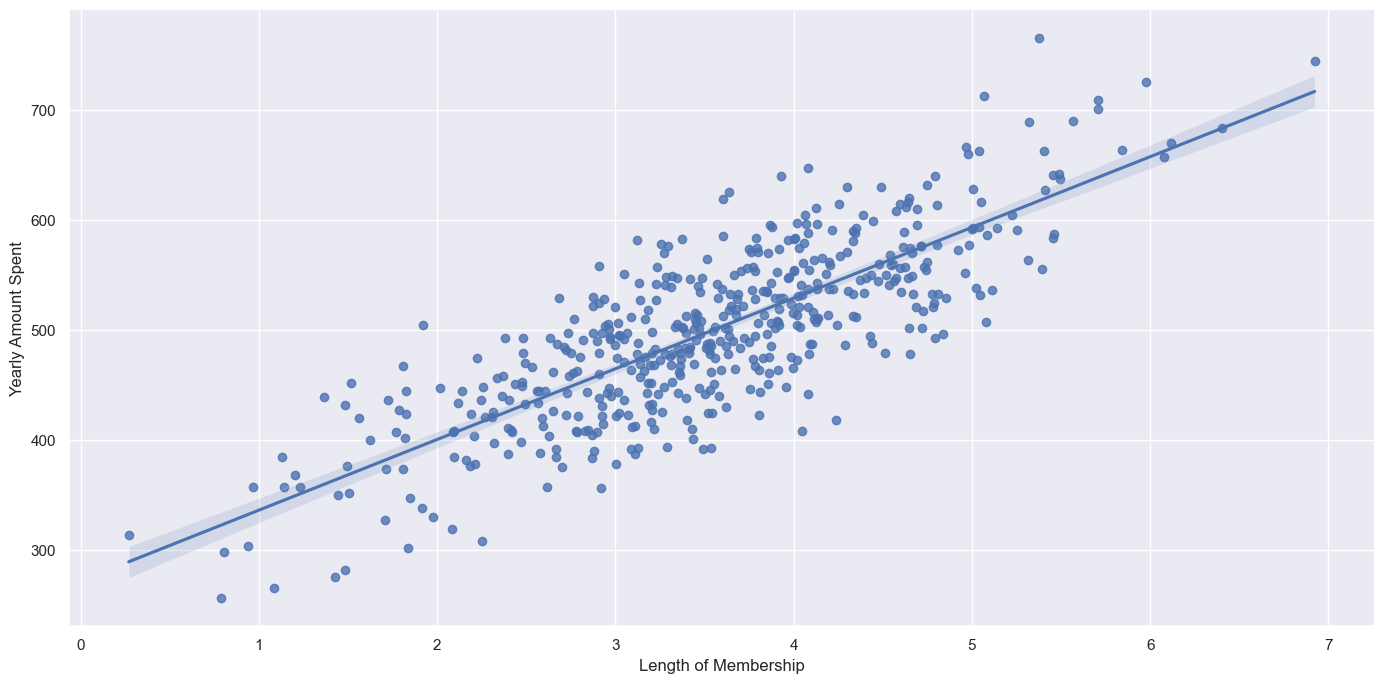

In [34]:
sns.lmplot(data=customers,x='Length of Membership', y='Yearly Amount Spent',height=7,
    aspect=2,)

In [35]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
y = customers['Yearly Amount Spent']

In [58]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
# Going to Train the Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [66]:
# Predicting the Test Data

In [67]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

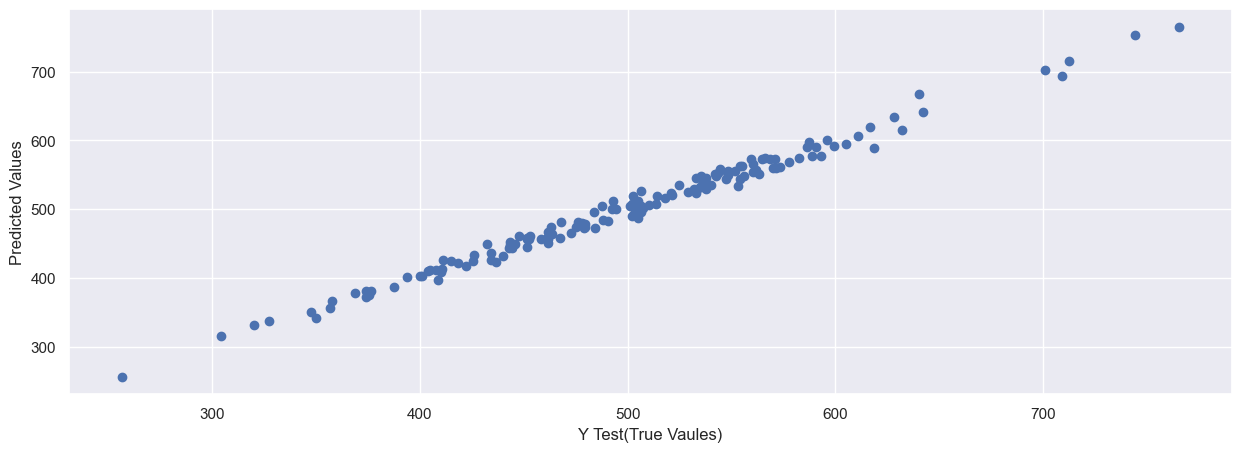

In [79]:
plt.figure(figsize=(15,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Vaules)')
plt.ylabel('Predicted Values')

In [80]:
from sklearn import metrics

In [81]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.228148653430815
MSE 79.81305165097409
RMSE 8.933815066978614


In [82]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

In [83]:
# Going to look at the Residuals 

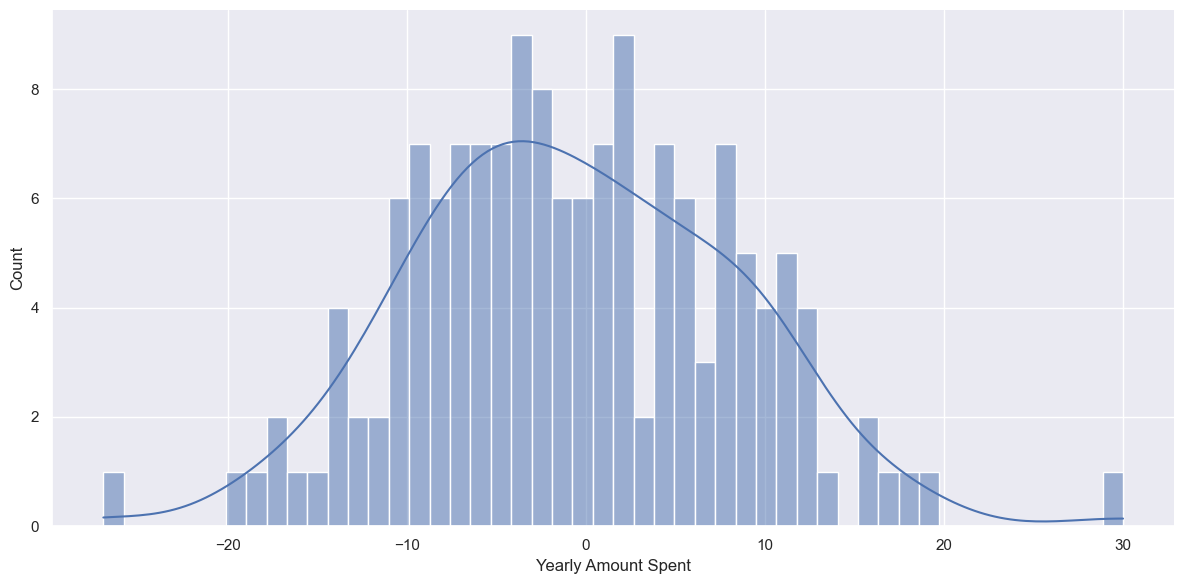

In [88]:
sns.displot((y_test-predictions),bins=50,kde=True,height=6,
    aspect=2,)

#### Conclusion 

In [91]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#####  If you whole everything fixes a one unit increase in 'Time on App'  it is associated with a 38.59 dollar spent year

######  I think that this company should focus more on their moblie app to gain more profit or you could working on the Website to catch up with the App